In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('game.csv', parse_dates=['game_date'])

In [3]:
basket = df[['game_date','min','matchup_home','wl_home','season_type','pts_home','pts_away',\
            'fgm_home','fga_home','ftm_home','fta_home','reb_home','ast_home','stl_home','tov_home','pf_home',\
           'fgm_away','fga_away','ftm_away','fta_away','reb_away','ast_away','stl_away','tov_away','pf_away']]
basket = basket.dropna()
basket = basket.drop(['matchup_home'],axis = 1)
basket['pts'] = basket['pts_home'] - basket['pts_away']
basket['fgm'] = basket['fgm_home'] - basket['fgm_away']
basket['fga'] = basket['fga_home'] - basket['fga_away']
basket['ftm'] = basket['ftm_home'] - basket['ftm_away']
basket['fta'] = basket['fta_home'] - basket['fta_away']
basket['reb'] = basket['reb_home'] - basket['reb_away']
basket['ast'] = basket['ast_home'] - basket['ast_away']
basket['stl'] = basket['stl_home'] - basket['stl_away']
basket['tov'] = basket['tov_home'] - basket['tov_away']
basket['pf'] = basket['pf_home'] - basket['pf_away']

In [4]:
regular = basket[basket['season_type'] == 'Regular Season']
regular = regular.drop(['game_date','min','season_type','pts_home','pts_away',\
                       'fgm_home','fga_home','ftm_home','fta_home','reb_home',\
                       'ast_home','stl_home','tov_home','pf_home','fgm_away',\
                       'fga_away','ftm_away','fta_away','reb_away','ast_away',\
                       'stl_away','tov_away','pf_away'],axis=1)
def wintonum(x):
    if (x == 'W'):
        return 1
    else:
        return 0
    
regular['wl_home'] = regular['wl_home'].apply(wintonum)

# Initial Investigation for the Dataset

Contrary to other machine learning algorthims that we are going to implement for the analysis and prediction,
GaussianNB method assumes that features are normally distributed. 

Other algorithms such as Random Forest, KNN, Decision Trees, and Neural Network are non-parametric and do not have to meet strong normality assumptions about the distribution of variables. They can handle non-linear relationships and do not require normality in the features.

As shown in the figures below, every histograms are fairly normally distributed by showing the symmetric shape.

In [9]:
regular = regular.drop(['pts','fgm'],axis=1)

X = regular.iloc[:, 1:]
y = regular.iloc[:,0] # wl_home

# Boxplot

boxplot doesnt show any scale issue so we dont need to use minmaxscalar or scaling
we dont have to remove outliers i guess

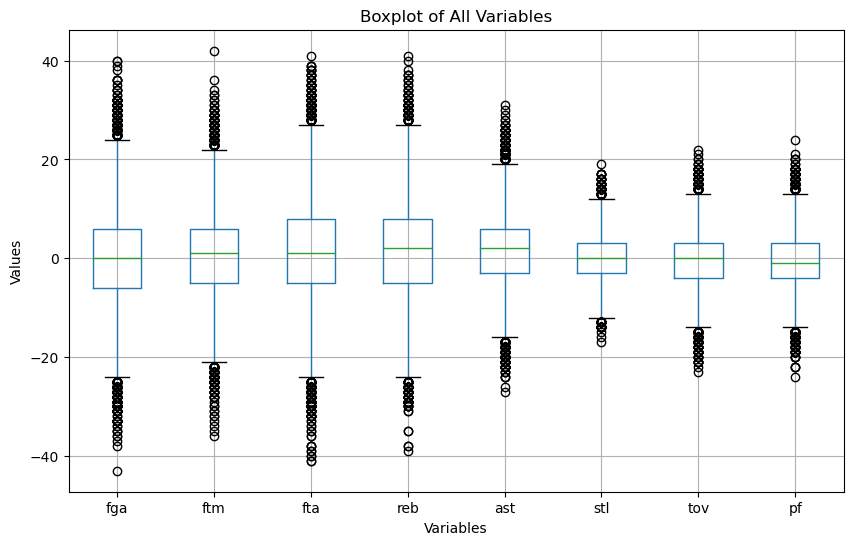

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

X.boxplot(ax=ax)

ax.set_title('Boxplot of All Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Values')

plt.show()

# Pairs Plot and Histogram

There is no any cluster in our dataset
Overall, by using all the plots and assumptions, PCA will not help us.

In [12]:
sns.pairplot(X)
plt.show()